# Mounting Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the FastAI Libaries

In [2]:
from fastai.vision.all import *

# Setting the path and checking the file length

In [7]:
path = "/content/drive/MyDrive/"
files = get_image_files("/content/drive/MyDrive/data_for_covid_patient")
len(files)

5232

In [10]:
files[0].name

'VIRUS-3696109-0002.jpeg'

## Regular Expression for taking the name of the file

In [9]:
pat = r'^([A-Za-z]+)'

# Building the Data Block with data augmentation

In [13]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

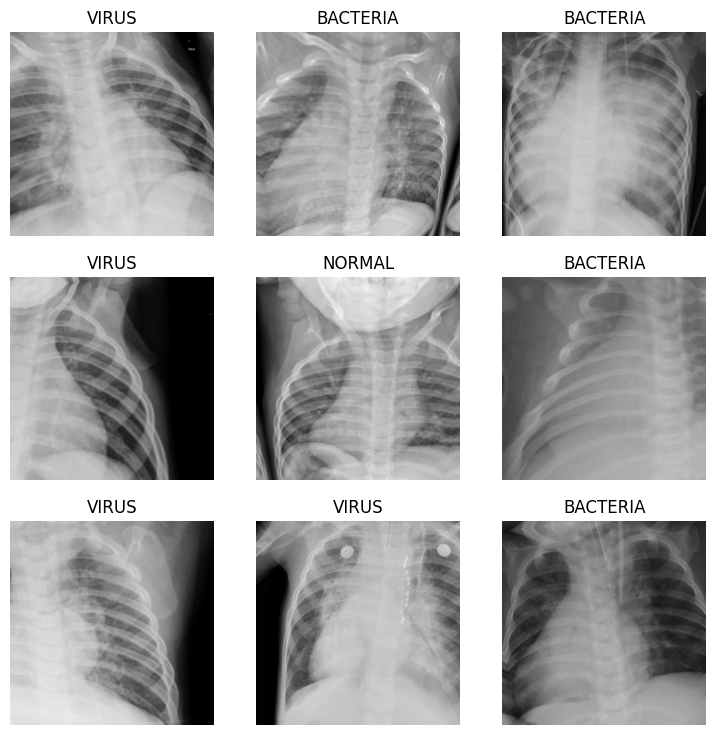

In [14]:
dls.show_batch()

# Built the model with VGG16

In [15]:
learn = vision_learner(dls, vgg16, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 87.0MB/s]


## Searching the optimun Learning rate

SuggestedLRs(valley=0.0012022644514217973)

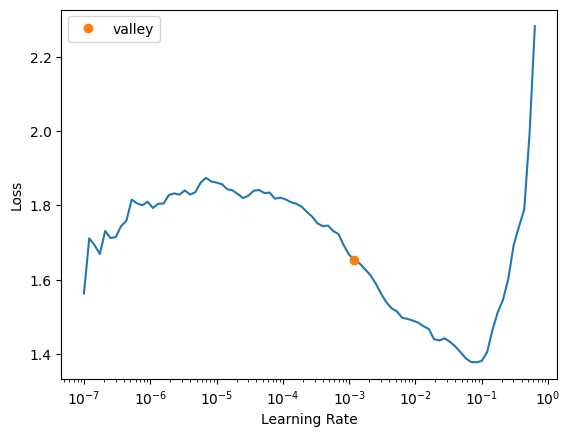

In [16]:
learn.lr_find()

# 5 = epochs and 0.0012022= learning rate

In [17]:
learn.fine_tune(5, 0.0012022)

epoch,train_loss,valid_loss,error_rate,time
0,1.114013,0.694699,0.277247,04:26


epoch,train_loss,valid_loss,error_rate,time
0,0.801131,0.675725,0.261950,02:40
1,0.737524,0.630271,0.238050,02:38
2,0.658081,0.572923,0.225621,02:37
3,0.630886,0.580158,0.234226,02:38
4,0.585510,0.563112,0.227533,02:38


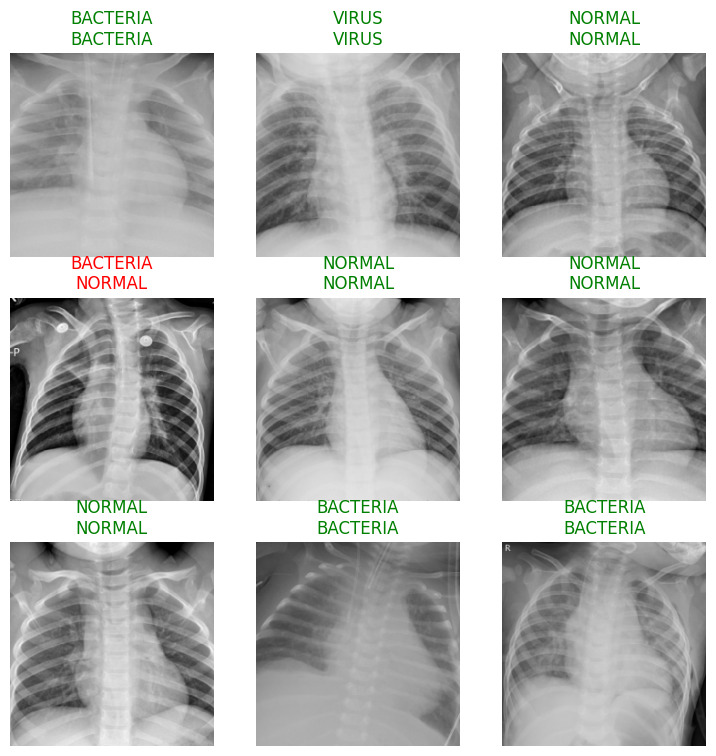

In [18]:
learn.show_results()

In [26]:
learn.predict("/content/sample_data/Untitled.jpeg")

('NORMAL', tensor(1), tensor([7.6343e-03, 9.9221e-01, 1.5270e-04]))

In [27]:
pwd

'/content'

In [ ]:
learn.export('model.pkl')